# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# IMPORTING DATASET

In [2]:
s_train = pd.read_csv("/content/SalaryData_Train.csv")
s_test = pd.read_csv("/content/SalaryData_Test.csv")

In [3]:
s_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
s_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


# FEATURE SELECTION

In [5]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [6]:
array = s_train.values
X = array[:,[0, 9, 10, 11,]]
Y = array[:,-1]
# feature extraction
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

[7.927e+03 7.412e+07 1.259e+06 5.569e+03]


In [7]:
features

array([[39, 2174, 0],
       [50, 0, 0],
       [38, 0, 0],
       ...,
       [58, 0, 0],
       [22, 0, 0],
       [52, 15024, 0]], dtype=object)

#INDEPENDENT AND DEPENDENT VARIABLES

In [8]:
X = s_train.iloc[0:30161, [0,9,10]].values
y= s_train.iloc[0:30161, -1].values

In [9]:
X

array([[   39,  2174,     0],
       [   50,     0,     0],
       [   38,     0,     0],
       ...,
       [   58,     0,     0],
       [   22,     0,     0],
       [   52, 15024,     0]])

In [10]:
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# ENCODING THE DATA

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y) 

In [12]:
y

array([0, 0, 0, ..., 0, 0, 1])

# SPLITTING THE DATASET

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0 )

In [14]:
X_train

array([[  38,    0,    0],
       [  66,    0,    0],
       [  55,    0,    0],
       ...,
       [  50,    0,    0],
       [  49,    0,    0],
       [  34, 3325,    0]])

In [15]:
y_train

array([1, 1, 0, ..., 0, 1, 0])

In [16]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
X_test

array([[21,  0,  0],
       [21,  0,  0],
       [56,  0,  0],
       ...,
       [20,  0,  0],
       [38,  0,  0],
       [57,  0,  0]])

# FEATURE SCALING

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [19]:
X_test

array([[-1.319, -0.145, -0.214],
       [-1.319, -0.145, -0.214],
       [ 1.348, -0.145, -0.214],
       ...,
       [-1.395, -0.145, -0.214],
       [-0.023, -0.145, -0.214],
       [ 1.425, -0.145, -0.214]])

# ML_ALGORITHM

In [20]:
# FITTING THE MODEL
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [21]:
#PREDICTING THE TEST
y_pred = classifier.predict(X_test)

# K-FOLD CV

In [22]:
from sklearn.model_selection import KFold
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [23]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv = kfold)
print("Accuracy: {:.2f} % " .format(accuraries.mean()*100 ))
print("Standard Deviation: {:.2f} % " .format(accuraries.std()*100))

Accuracy: 78.29 % 
Standard Deviation: 1.50 % 


# MAKING THE CONFUSION MATRIX

In [24]:
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[5383  304]
 [1301  553]]
0.7871635061662909


# XG BOOST

In [25]:
from xgboost import XGBClassifier

In [26]:
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [27]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [28]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.04%


# TEST DATA SET

In [29]:
A = s_test.iloc[:, [0,9,10]].values
b = s_test.iloc[:, -1].values

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder_b= LabelEncoder()
b = labelencoder_b.fit_transform(b)

In [31]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.25, random_state = 0 )

In [32]:
b_train

array([0, 1, 0, ..., 0, 0, 0])

In [33]:
from sklearn.preprocessing import StandardScaler
sc_A = StandardScaler()
A_train = sc_A.fit_transform(A_train)
A_test = sc_A.fit_transform(A_test)

In [34]:
# FITTING THE MODEL
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [35]:
#PREDICTING THE TEST
b_pred = classifier.predict(A_test)
b_pred

array([0, 1, 0, ..., 0, 0, 1])

In [36]:
from sklearn.model_selection import KFold
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [37]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator = classifier, X = A_test, y = b_test, cv = kfold)
print("Accuracy: {:.2f} % " .format(accuraries.mean()*100 ))
print("Standard Deviation: {:.2f} % " .format(accuraries.std()*100))

Accuracy: 78.70 % 
Standard Deviation: 2.30 % 


In [38]:
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(b_test, b_pred)
acc = accuracy_score(b_test, b_pred)
print(cm)
print(acc)

[[2665  151]
 [ 650  299]]
0.7872509960159363


In [39]:
# PREDICTING THE NEW DATA POINT
new_data=pd.DataFrame({"age": 24, "capitalgain": 7688, "capitaloss": 0},index=[0])
new_data

,age,capitalgain,capitaloss
0,24,7688,0


In [40]:
classifier.predict(new_data)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array([1])

# MLR

In [41]:
import statsmodels.api as sm 
X = np.append(arr = np.ones((30161,1)).astype(int), values = X, axis = 1)

In [42]:
# BACKWARD ELIMINATION
X_opt = X[:, [0,1,2]]
X_opt = np.array(X_opt, dtype = float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1667.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:36:18   Log-Likelihood:                -15928.
No. Observations:               30161   AIC:                         3.186e+04
Df Residuals:                   30158   BIC:                         3.189e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0496      0.007     -6.790      0.000      -0.064      -0.035
x1             0.0074      0.000     41.174      0.000       0.007       0.008
x2          1.186e-05    3.2e-07     37.050      0.000    1.12e-05    1.25e-05
==============================================================================
Omnibus:                     4577.053   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6024.072
Skew:                           1.062   Prob(JB):                         0.00
Kurtosis:                       2.472   Cond. No.                     2.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# DATA VISUALIZATIONS

In [44]:
X = s_train.iloc[:, [0, 9]]
y = s_train.iloc[:, -1]

In [45]:
# ENCODING THE CATEGORICAL DATA
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [46]:
# SPLITTING THE DATASET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0 )

In [47]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [48]:
# FITTING THE MODEL
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [49]:
#Predicting the test 
y_pred = classifier.predict(X_test)

In [50]:
# MEASURING THE ACCURACY
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[5540  147]
 [1464  390]]
0.7863678557220528


<ipython-input-51-6c7dfe2a714d>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


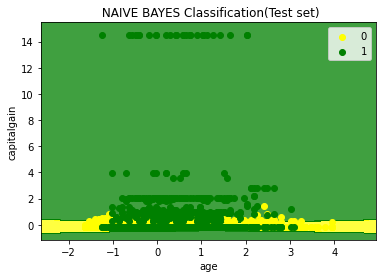

In [51]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c= ListedColormap(('yellow', 'green'))(i), label= j)
plt.title(' NAIVE BAYES Classification(Test set)')
plt.xlabel('age')
plt.ylabel('capitalgain')
plt.legend()
plt.show()

<ipython-input-52-eb93171d826f>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


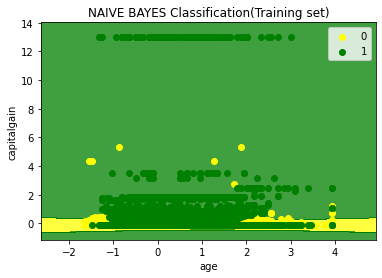

In [52]:
#Visualizing the train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c= ListedColormap(('yellow', 'green'))(i), label= j)
plt.title('NAIVE BAYES Classification(Training set)')
plt.xlabel('age')
plt.ylabel('capitalgain')
plt.legend()
plt.show()